# [WUM] Praca domowa nr 4
## Kacper Kurowski

Zacznijmy od wczytania danych 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("clustering.csv",  header = None).to_numpy()

In [19]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

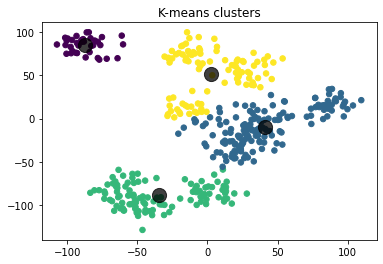

In [20]:
plot_kmeans_clusters( data, n_clusters=4)

Postarajmy się znaleźć optymalną liczbę klastrów przy pomocy minimalizacji sumy kwadratów wewnątrz klastrów.

In [21]:


def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores



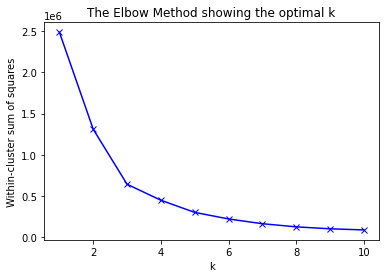

In [23]:
wcss_vec = count_wcss_scores( data, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Niestety, metoda ta nie daje tym razem dobrej sugestii co do tego jaką liczbę klastrów warto by wybrać. Z tego powodu skorzystajmy z innej metody.

In [24]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

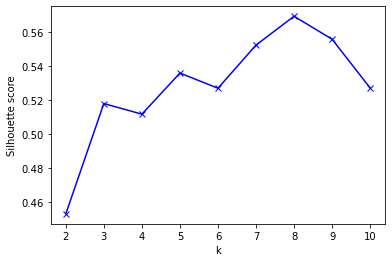

In [26]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11) 
silhouette_vec = count_clustering_scores( data, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Zdaje się zatem, że to 8 jest najodpowiedniejszą liczbą kalstrów.

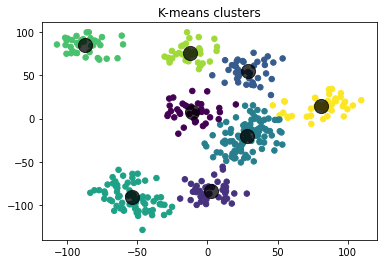

In [27]:
plot_kmeans_clusters( data, n_clusters=8)

Rzeczywiście uzyskiwane klastry wydają się być "rozsądne". Należy jednak zaznaczyć, że klastry te zdają się być dość "okrągłe", więc rezultat ten być może nie odzwierciedla ewentualnej "spójności" klastrów - przykładowo, 3 klastry ze współrzędną y ok. - zdają się tworzyć niemal spójny twór, czego uzyskany podział nie odzwierciedla.

Zastosujmy również metodę, która może nieco bardziej będzie wyłapywać wspomnianą spójność

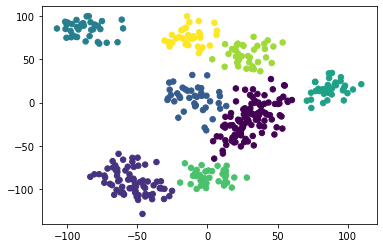

In [5]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=8)
y = model.fit_predict( data)
plt.scatter( data[:, 0], data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

Jak widać na powyższym wykresie, kilka punktów, które wcześniej były w klastrze najbardziej na prawo, teraz przeszło do purpurawego po środku. Podobnie kilka punktów z dolnego po środku przeszło do wspomnianego purpurawego.

Gdybyśmy natomiast zdecydowali się zmienić liczbę klastrów na 5, uzyskalibyśmy poniiższy rezultat.

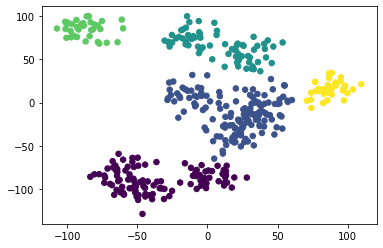

In [6]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5)
y = model.fit_predict( data)
plt.scatter( data[:, 0], data[:, 1], c=y, s=30, cmap='viridis')
plt.show()

Który zdaje się nieco bardziej odzwrierciedlać wspomane "spójności". Wreszcie, możemy skorzystać z algorytmów hierarhicznych.

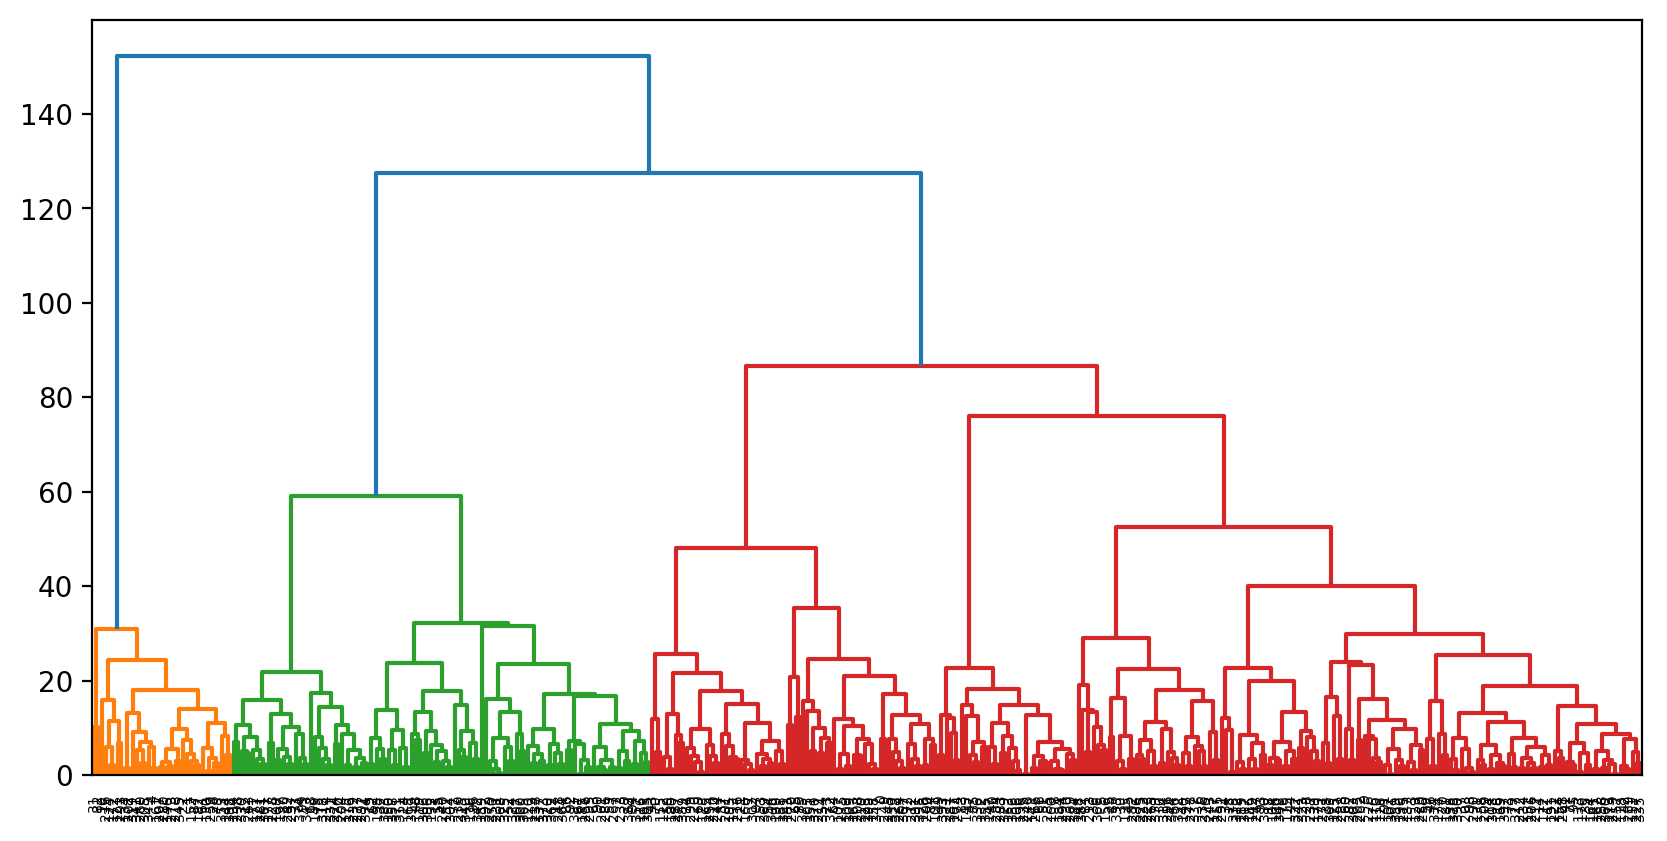

In [30]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage( data, method='average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z)
plt.show()

tym razem odpowiedź nie jest juz taka oczywista. Teoretycznie wciąż 8 klastrów daje dobre rezultaty, ale prawa strona wykresu sugeruje, że zysk z podzielenia na więcej klastrów nie jest już tak duży jak przy tych pierwszych podziałach.